# Name: Qaidjohar Dama
# Batch: DST 10923

# Problem Statement: The airline industry is highly competitive, and customer satisfaction plays a crucial role in retaining and attracting passengers. To enhance the quality of services and address customer concerns effectively, it is essential to analyze the dataset containing information about airline passengers, including demographics, travel preferences, flight experiences, and satisfaction levels. The goal is to develop a machine learning model that can predict and understand the factors contributing to customer satisfaction with airline services.

In [60]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score ,confusion_matrix, classification_report ,roc_curve, auc

# Loading Data Set

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([train, test], ignore_index = True)

In [3]:
train.shape

(103904, 25)

In [4]:
test.shape

(25976, 25)

### Train has a total of 103904 entries of 25 columns.
### Test has 103,904 entries of 25 columns.

In [5]:
train.head(-1)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Cleaning Data Set

In [10]:
def calculate_missing_values(data):
    total_missing = data.isnull().sum()  # Count the missing values in each column
    missing_data = pd.DataFrame({
        'Total Missing': total_missing
    })
    return missing_data

In [11]:
calculate_missing_values(train)

,Total Missing
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


Arrival Delay in Minutes has some missing Values in Train Data set.

In [12]:
calculate_missing_values(test)

,Total Missing
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


Arrival Delay in Minutes has some missing values in Test data set as well.

Removing these missing values.

In [13]:
train.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
test.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [14]:
train.isnull().any()

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

In [15]:
test.isnull().any()

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

### Unnamed : 0 and ID have no relation with Satisfaction, hence dropping these columns.

In [16]:
train = train.drop(labels = ['Unnamed: 0','id'], axis = 1)
test = test.drop(labels = ['Unnamed: 0','id'], axis = 1)
df = df.drop(labels = ['Unnamed: 0','id'], axis = 1)

### Checking for Duplicate Values

In [17]:
train.duplicated().any()

False

## Data Visualization

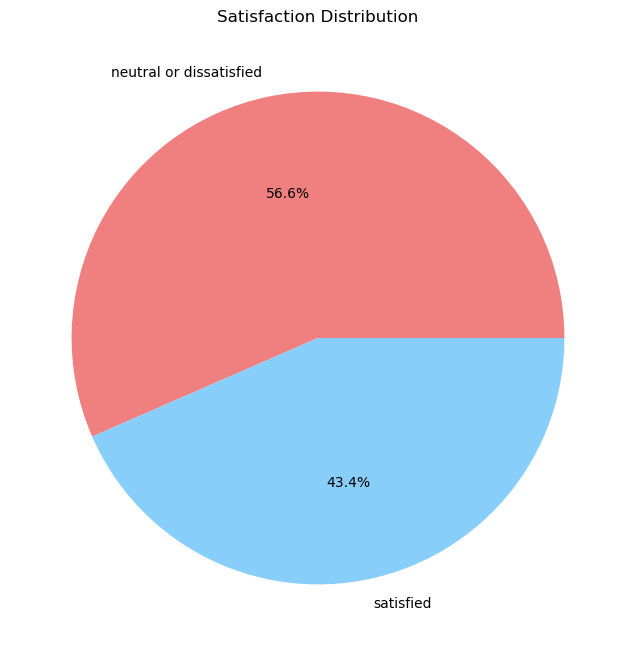

In [18]:
satisfaction_counts = df['satisfaction'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=0, 
        colors=['lightcoral', 'lightskyblue'])
plt.title('Satisfaction Distribution')
plt.show()

### 56.7% of the passengers in the survey were neutral or dissatisfied, the rest being satisfied with the airline. It is reasonable to assume that the class passengers are traveling in affects their satisfaction.

Text(0.5, 1.0, 'Count of Satisfaction by Travel Class')

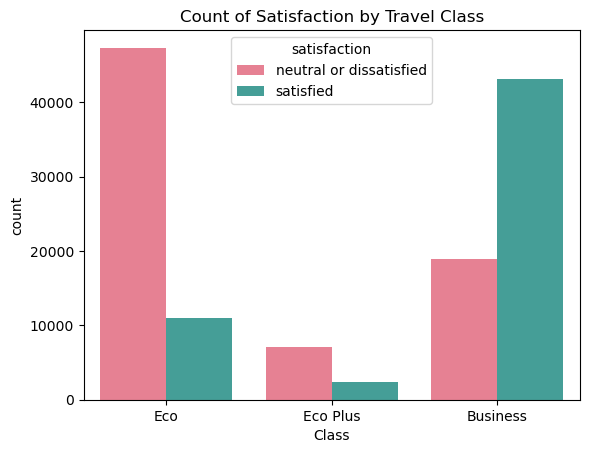

In [19]:
sns.countplot(x='Class',data = df, hue = 'satisfaction', order=['Eco', 'Eco Plus','Business'], palette='husl')
plt.title('Count of Satisfaction by Travel Class')

### Economy and Economy Plus tend to have more neutral or dissatisfied customers than satisfied customers, whereas Business Class has more satisfied customers than dissatisfied customers.

Text(0.5, 1.0, 'Type of Passengers and Choice of Class')

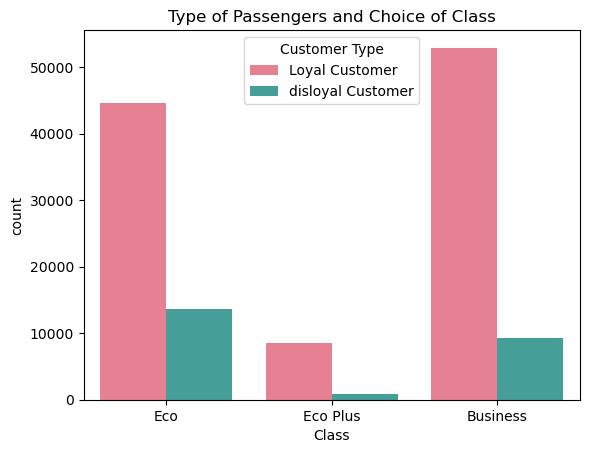

In [20]:
sns.countplot(x='Class',data = df, hue = 'Customer Type', order=['Eco', 'Eco Plus','Business'], palette='husl')
plt.title('Type of Passengers and Choice of Class')

### Regular Flyers(Loyal Customer) prefer Business Class the most followed by Economy. Whereas Irregular Flyers prefer Economy mostly.

Text(0.5, 1.0, 'Count of Satisfaction by Type of Passengers')

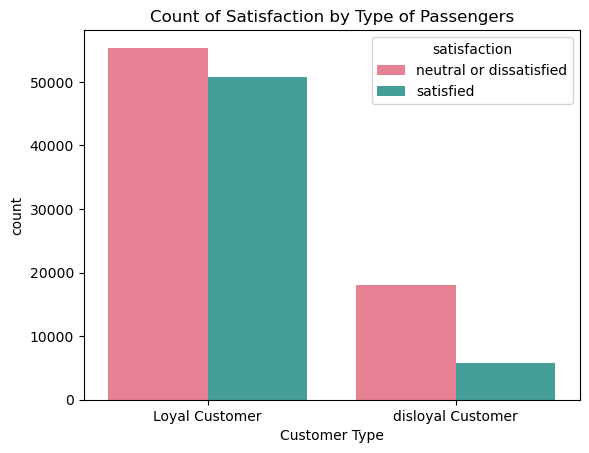

In [21]:
sns.countplot(x='Customer Type',data = df, hue = 'satisfaction',  palette='husl')
plt.title('Count of Satisfaction by Type of Passengers')

### Both Loyal Customers and Disloyal Customers had a large proportion of Dissatisfaction.

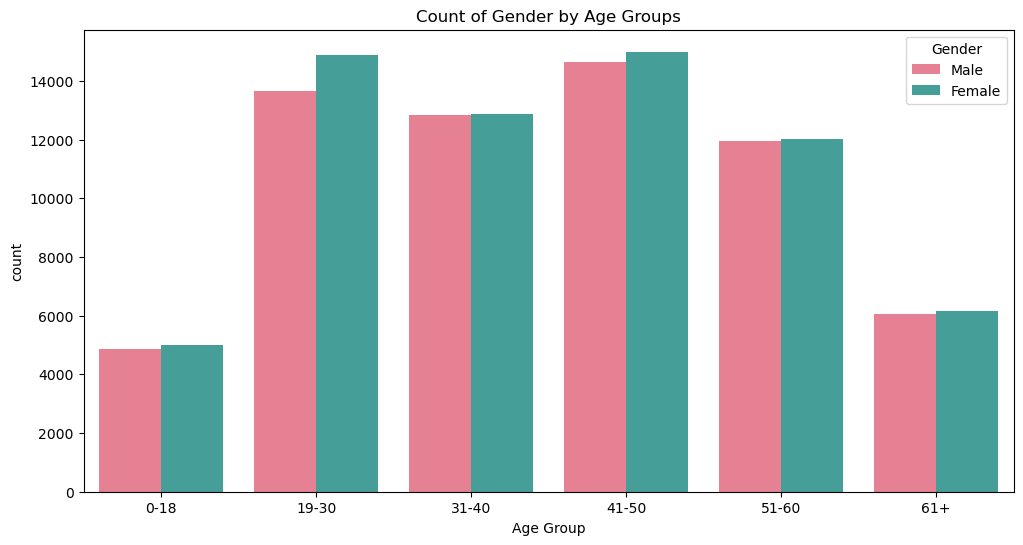

In [22]:
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plotting the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='Gender', data=df, palette='husl')

# Adding a title
plt.title('Count of Gender by Age Groups')

# Show the plot
plt.show()
df=df.drop(labels = ['Age Group'], axis = 1)

### For All age groups, Female is the Leading Gender  

Text(0.5, 1.0, 'Count of Satisfaction by Gender')

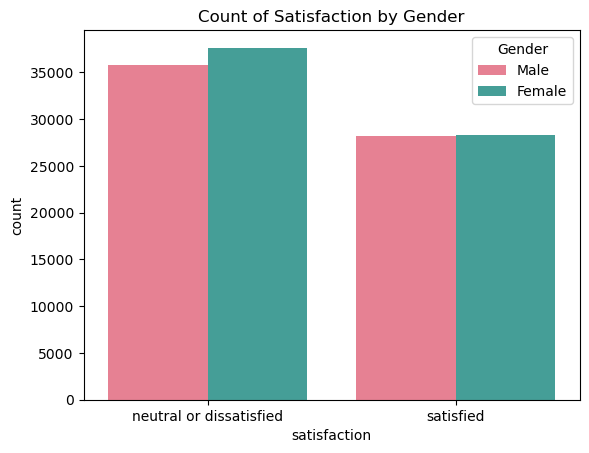

In [23]:
sns.countplot(x='satisfaction',data = df, hue = 'Gender',  palette='husl')
plt.title('Count of Satisfaction by Gender')

### Knowing the proportion of Male and Female genders, Males were slightly more satisfied than Females.

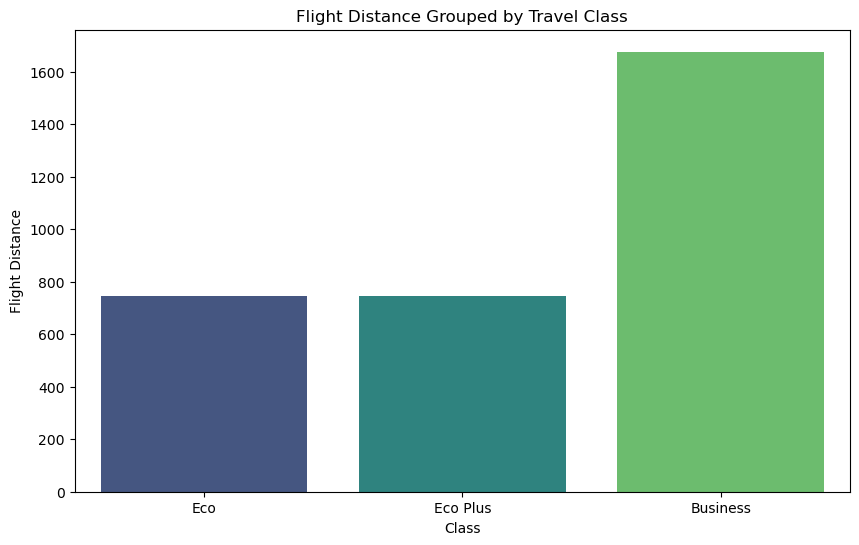

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Flight Distance', data=df,order=['Eco','Eco Plus','Business'], ci=None, palette='viridis')
plt.title('Flight Distance Grouped by Travel Class')
plt.show()

### Customers generally prefer Business Class for Larger Flight Distances.

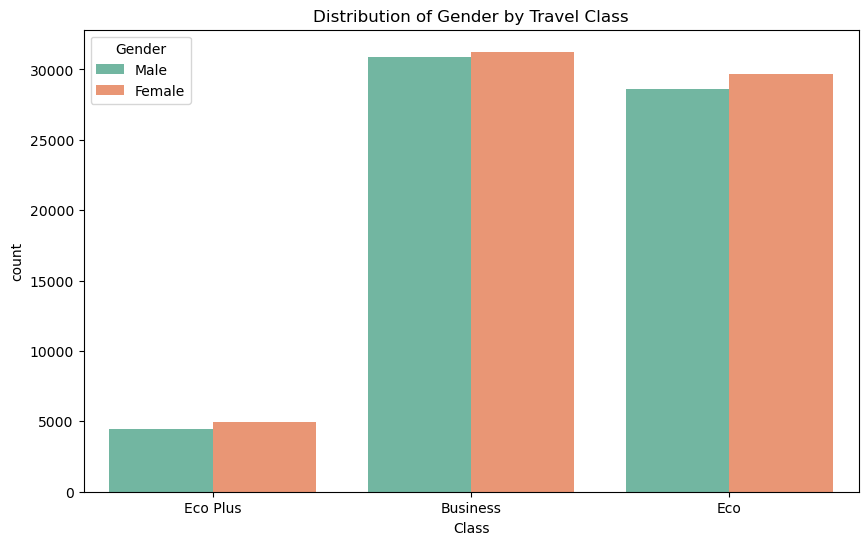

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Gender by Travel Class')
plt.show()

## Both Males And Female Customers prefer Business Class and Economy to Economy Plus.

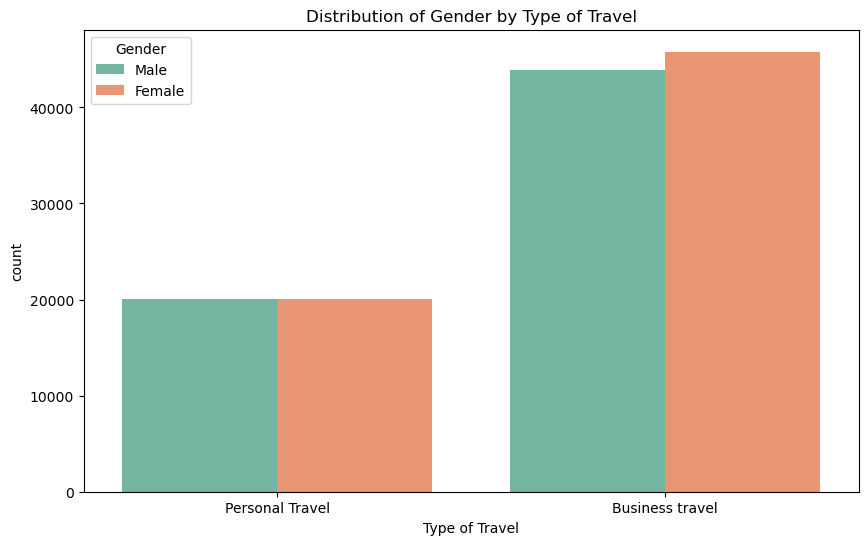

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Travel', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Gender by Type of Travel')
plt.show()

### Most Customers(Male and Female) were travelling due to Business Purposes.

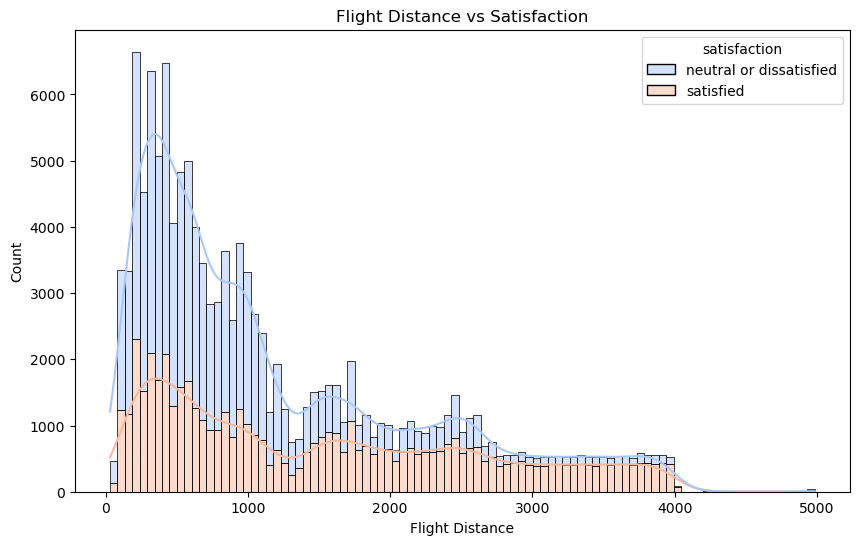

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Flight Distance', hue='satisfaction', multiple='stack', palette='coolwarm', kde=True)
plt.title('Flight Distance vs Satisfaction')
plt.show()

### Customers were more dissatisfied over Smaller Distance Flights whereas Larger Distance Flights had an equal proportion of Satisfied and Dissatisfied Customers.

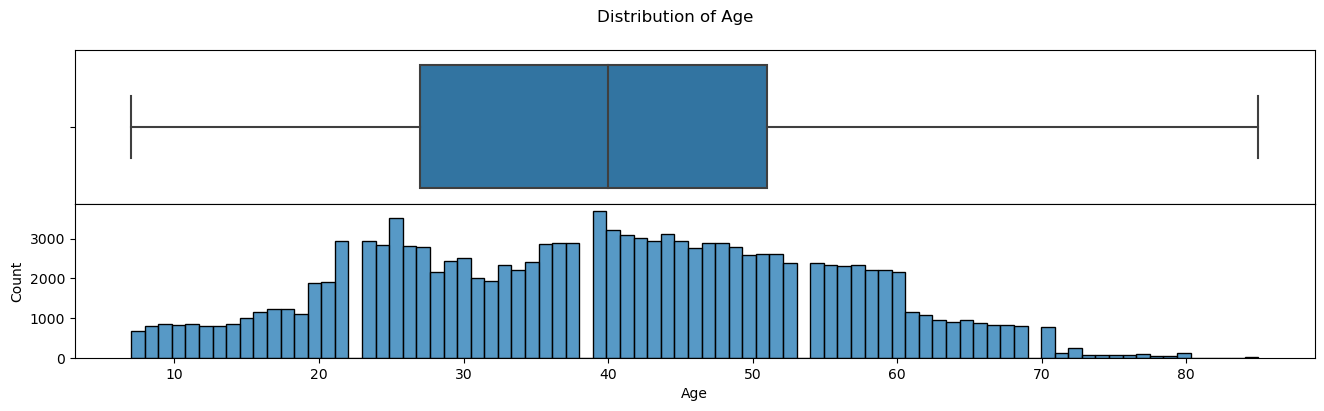

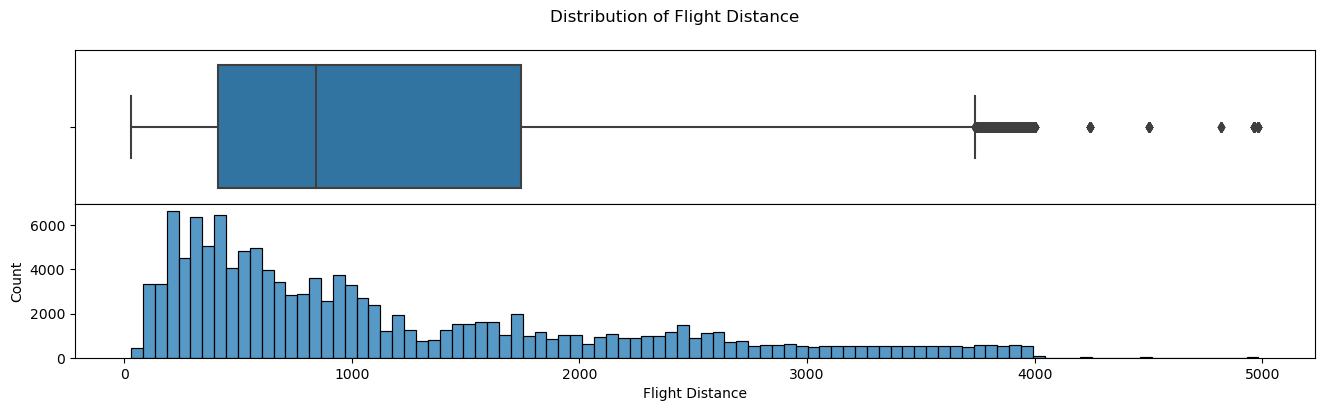

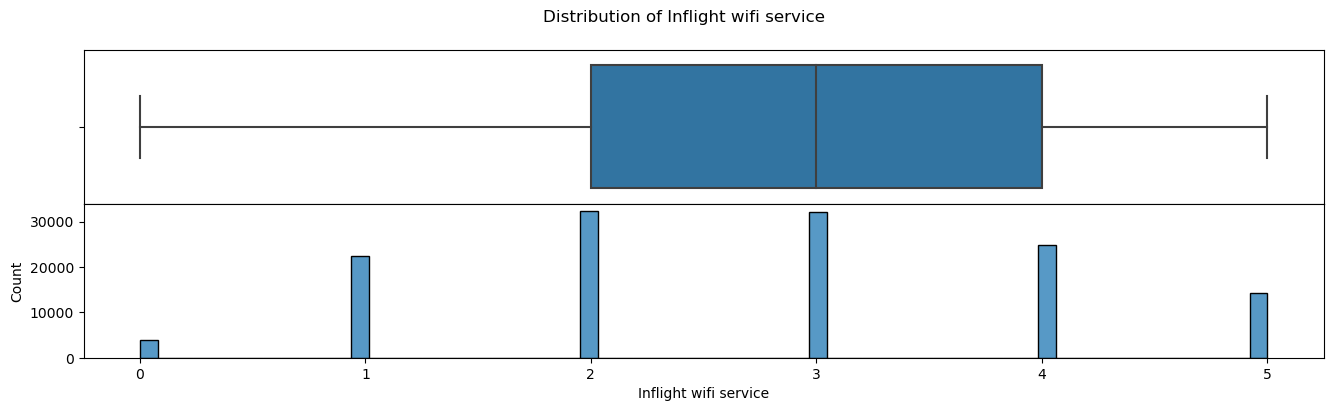

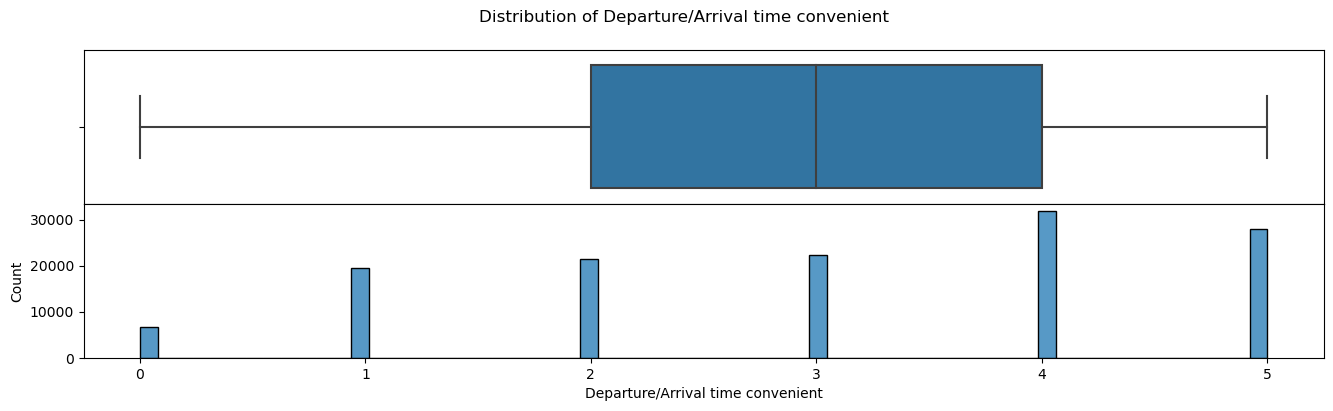

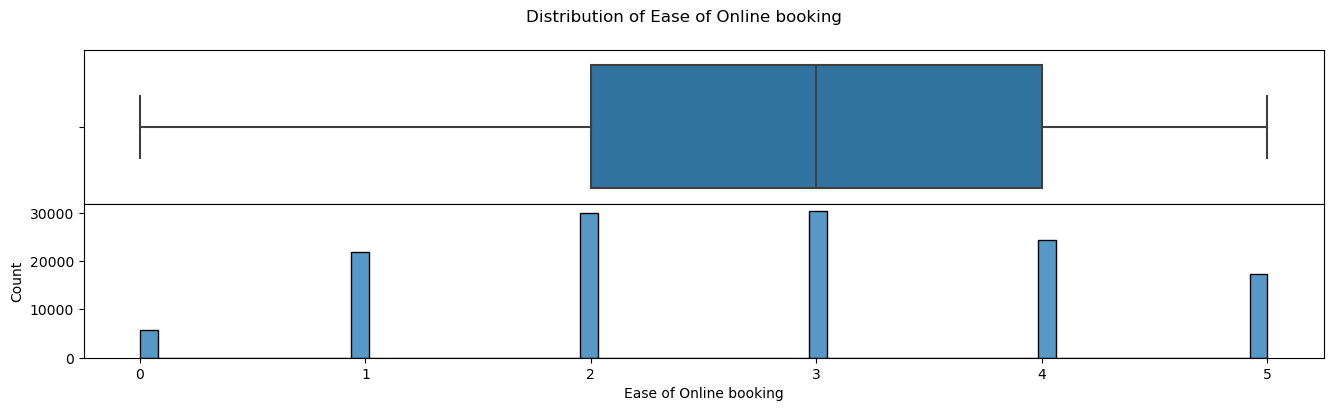

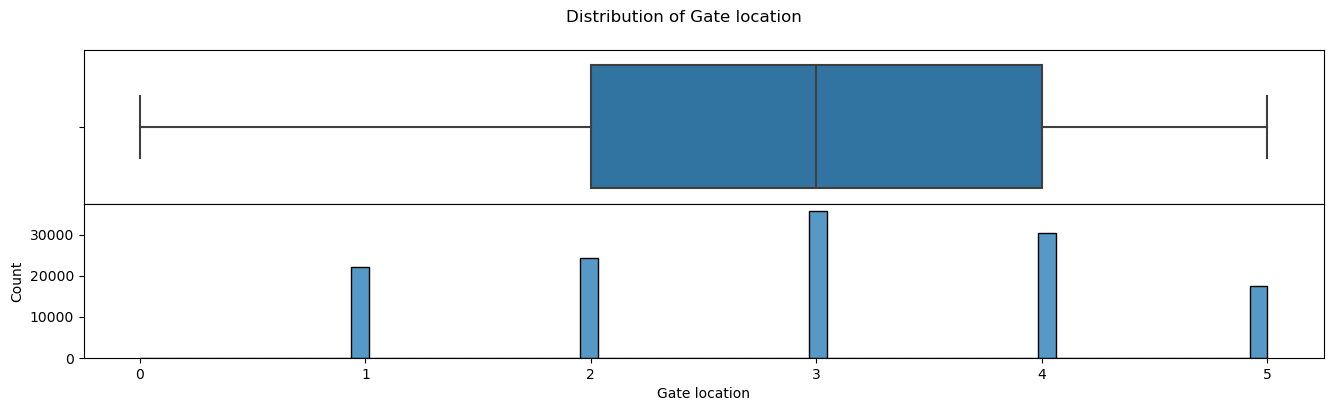

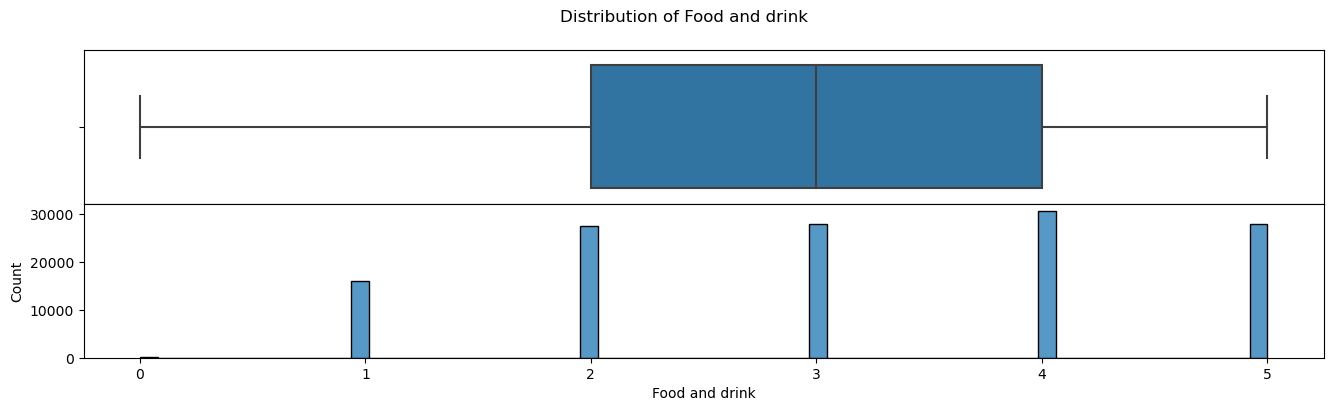

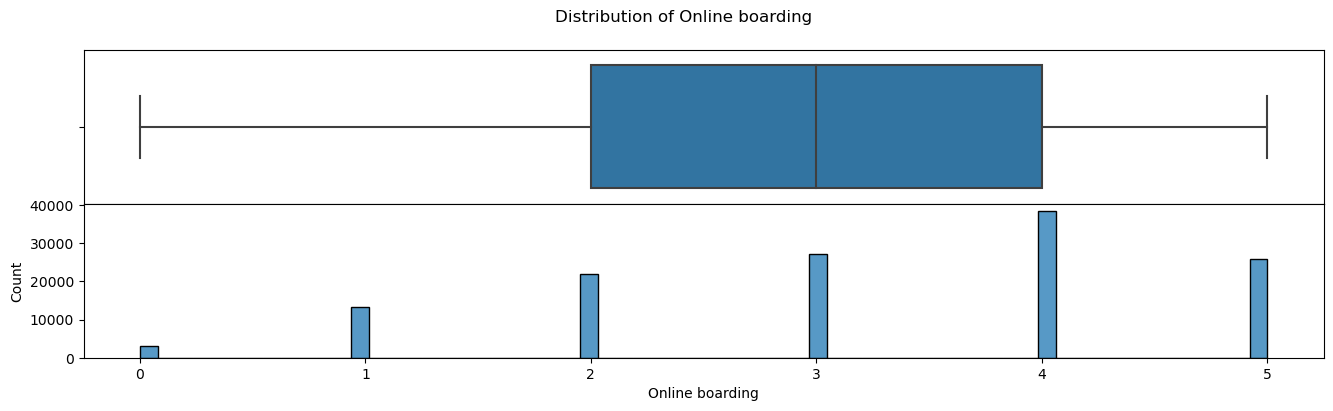

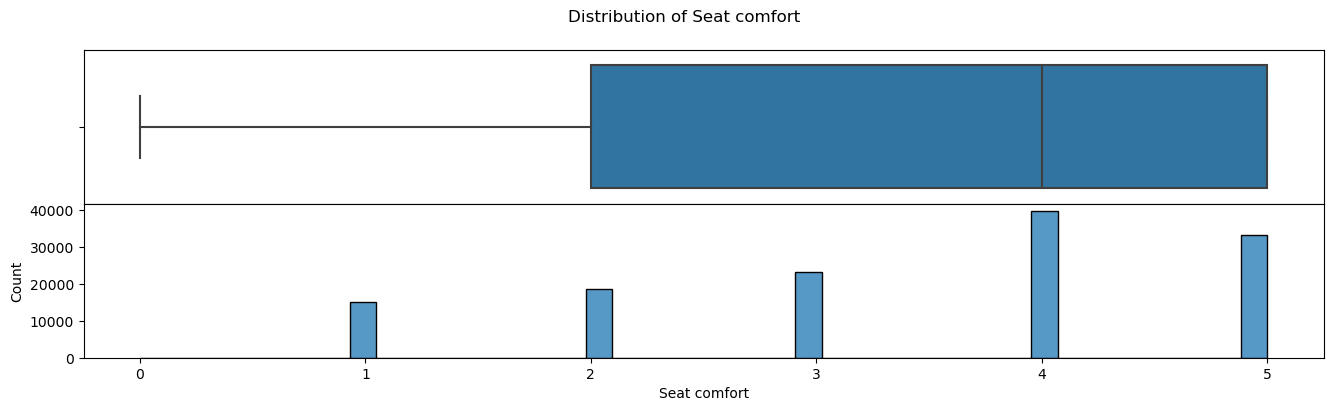

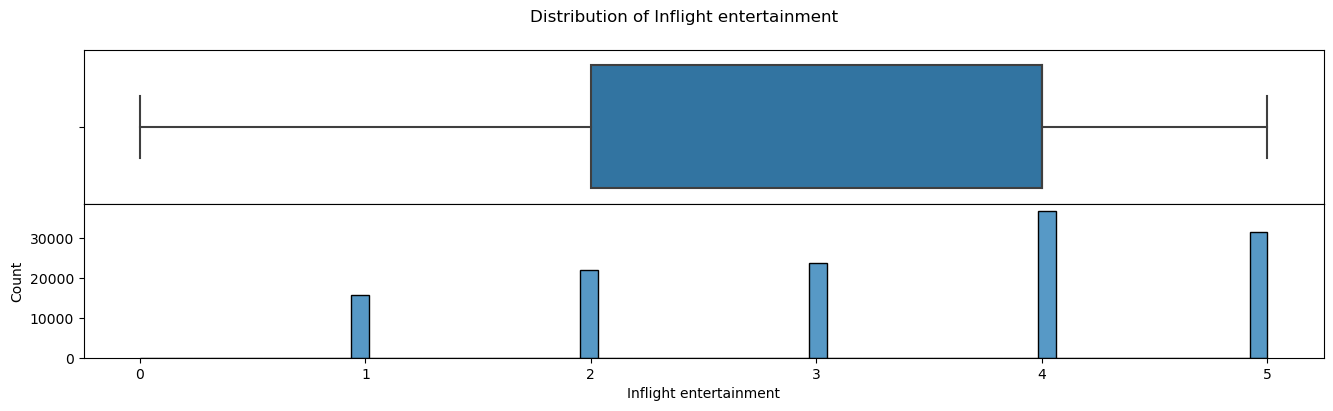

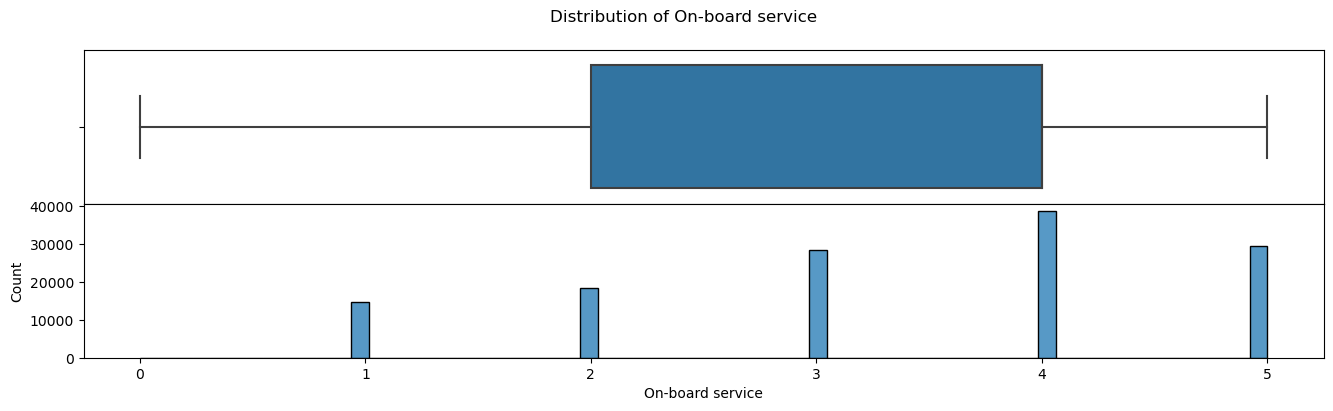

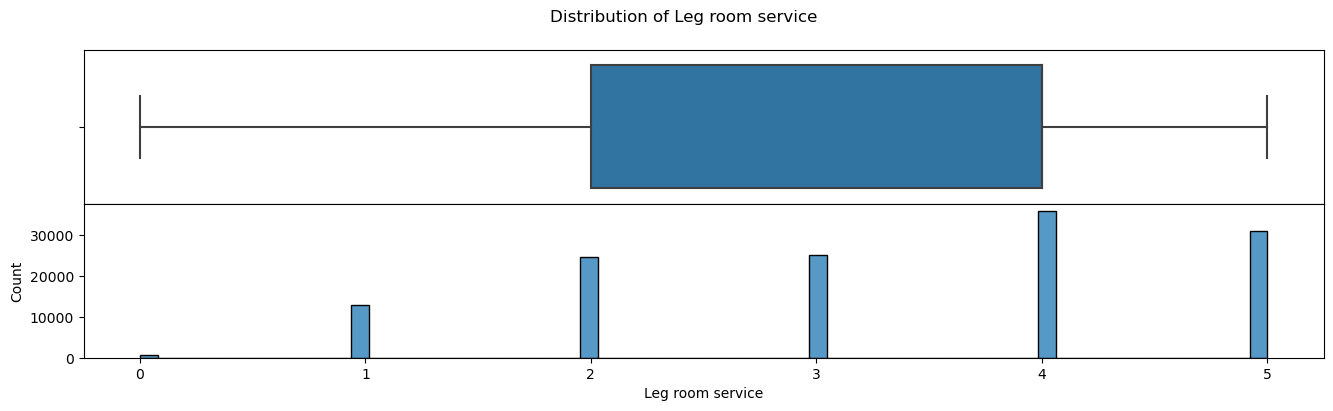

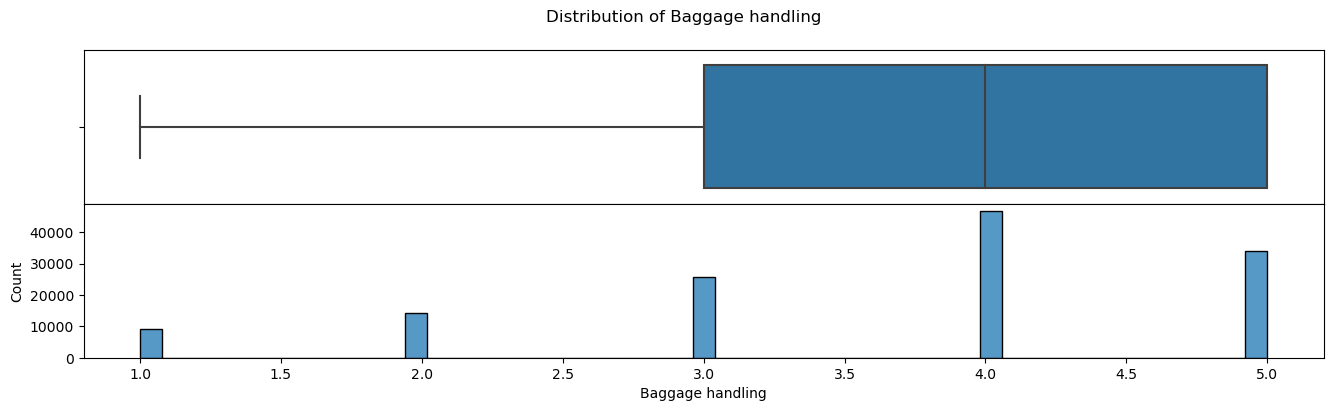

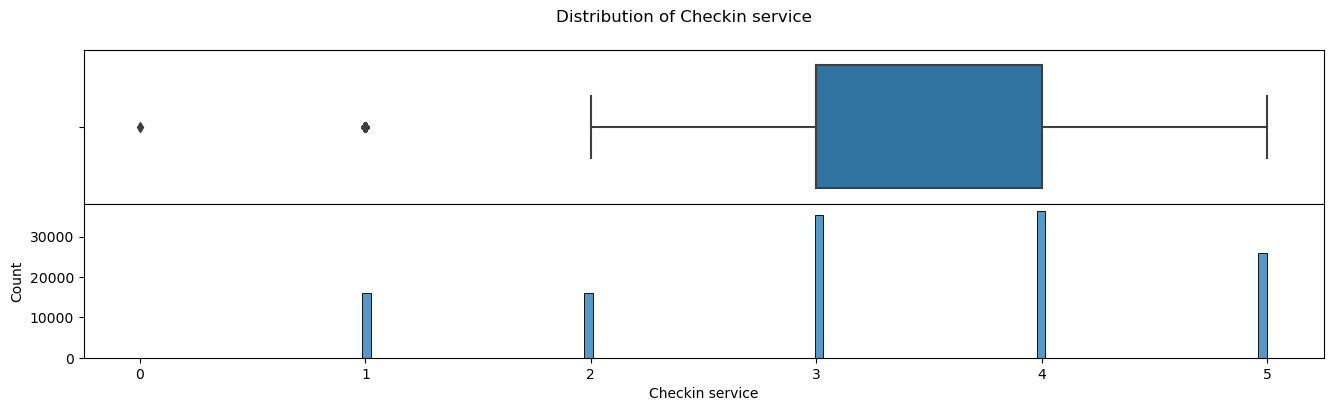

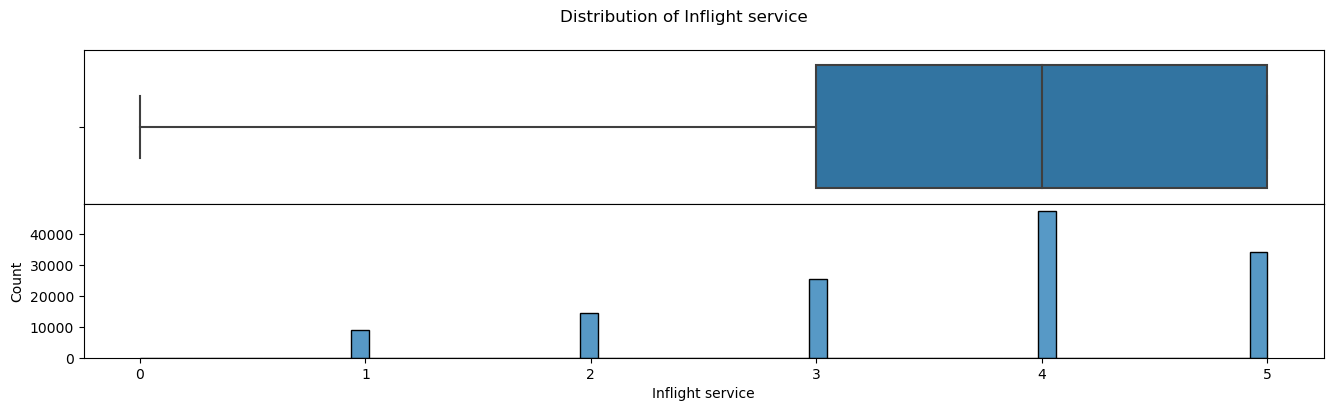

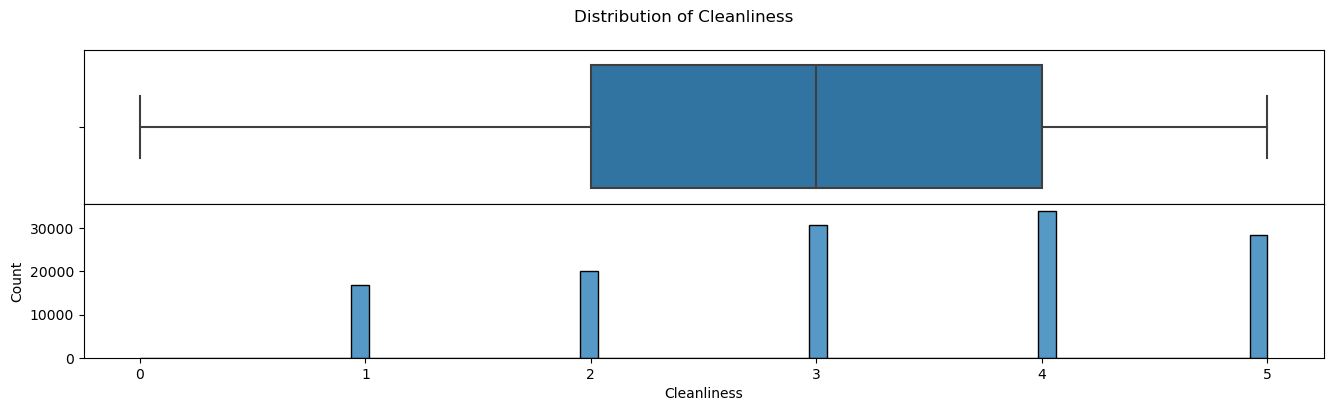

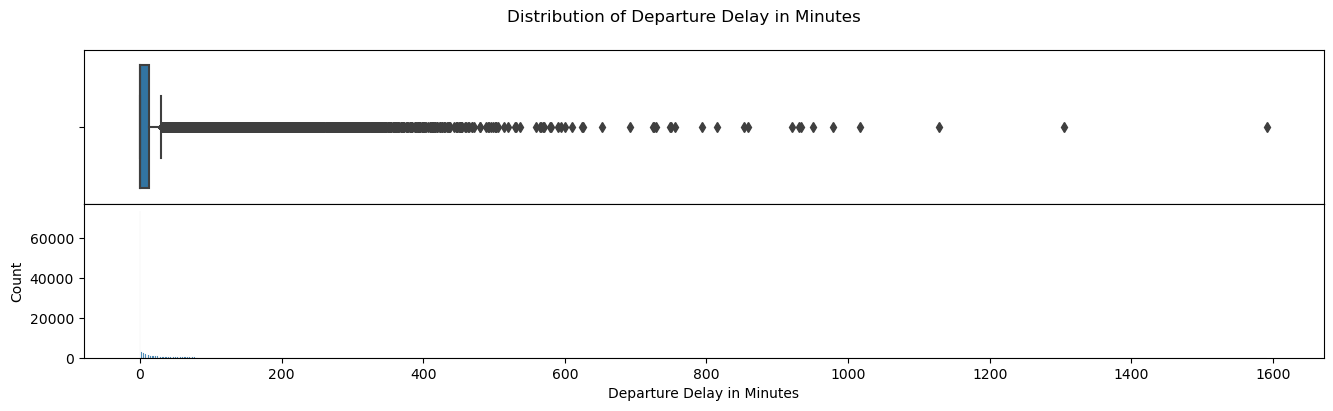

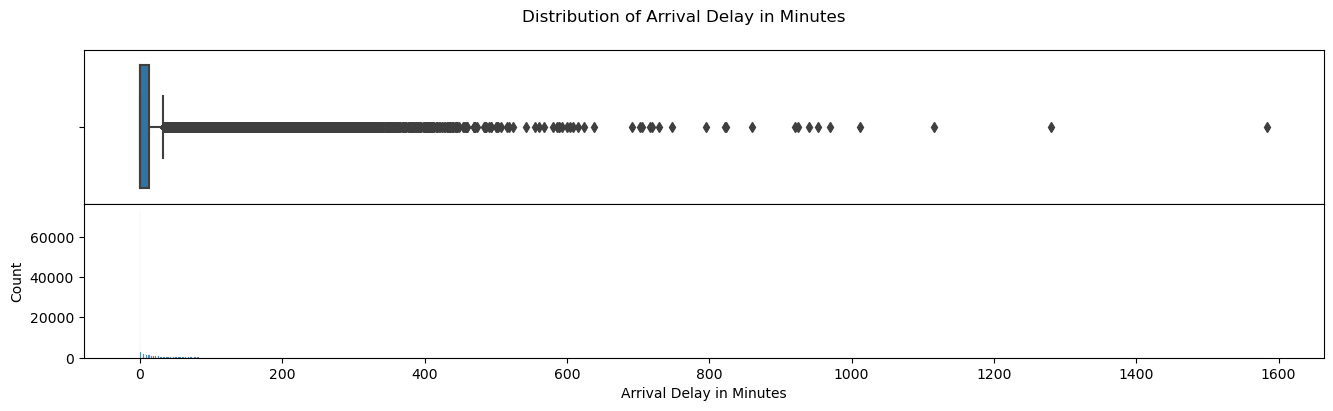

In [28]:
for col in df.select_dtypes(exclude='object'):
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")

  sns.boxplot(data=df, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  
  sns.histplot(data=df, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

### Above Group of Box Plots show that Flight Distance, Checkin Service,Departure Delay and Arrival Delay have Outliers that need to be removed.

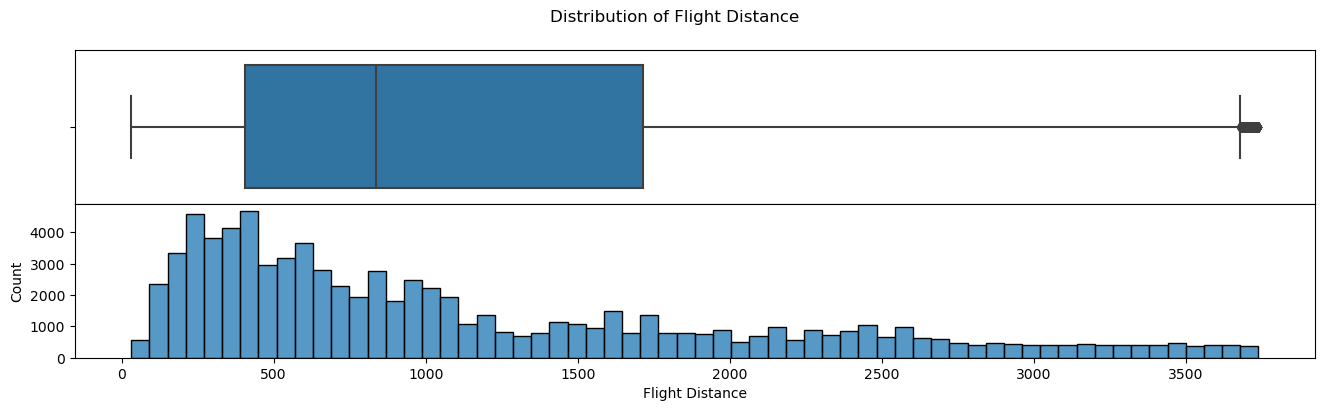

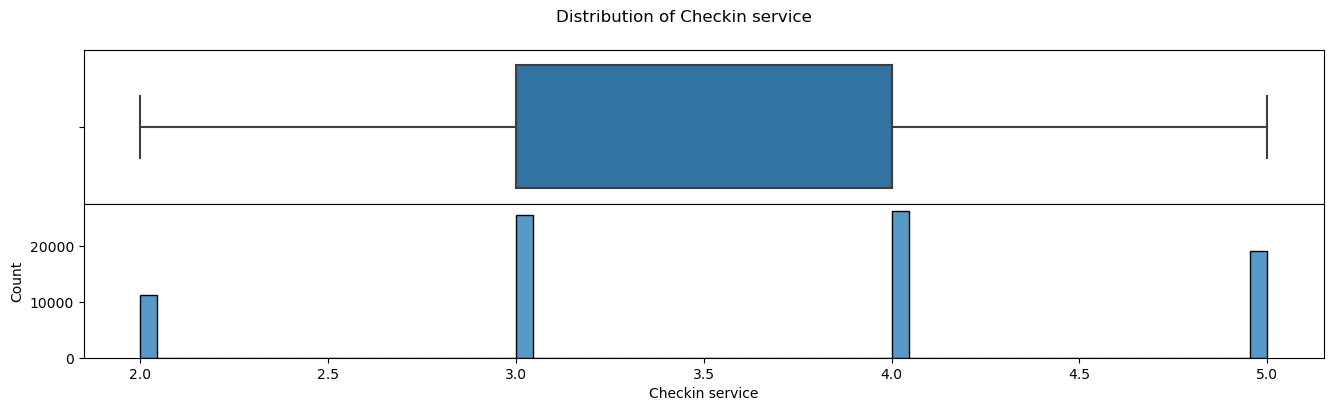

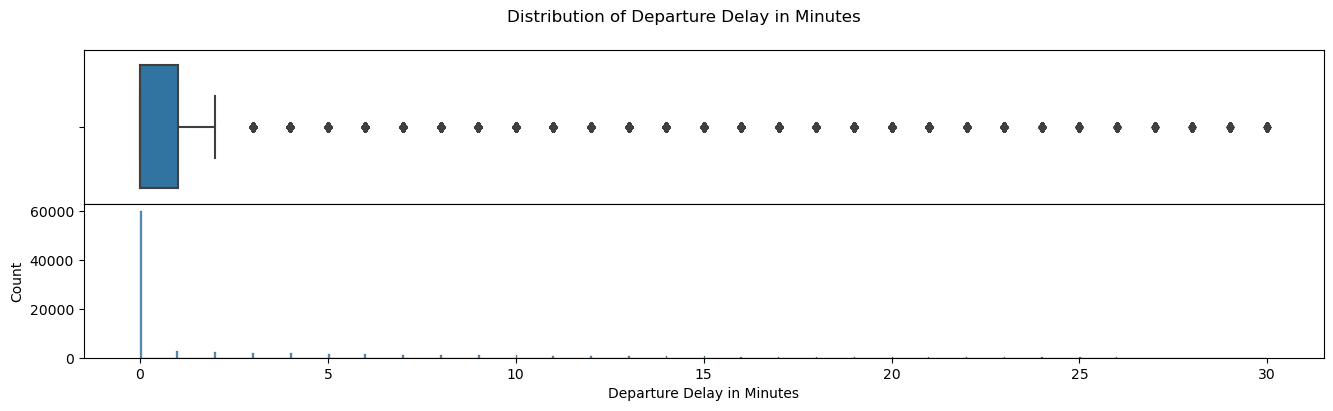

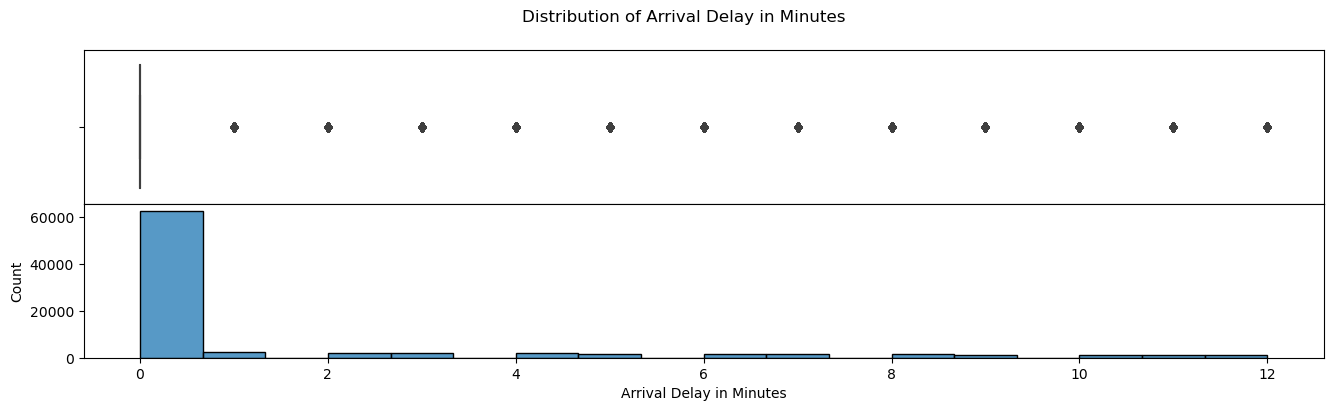

In [31]:
columns_to_process = ['Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

def process_outliers_and_impute(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    imputer = SimpleImputer(strategy='median')
    df_no_outliers[column] = imputer.fit_transform(df_no_outliers[[column]])

    return df_no_outliers

for column in columns_to_process:
    df = process_outliers_and_impute(df, column)
    
for col in columns_to_process:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")

  sns.boxplot(data=df, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  
  sns.histplot(data=df, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

### Most of the Outliers were removed from Flight Distance and Checkin Service
### As for the Departure and Arrival delay ,lets check with Correlation Matrix.

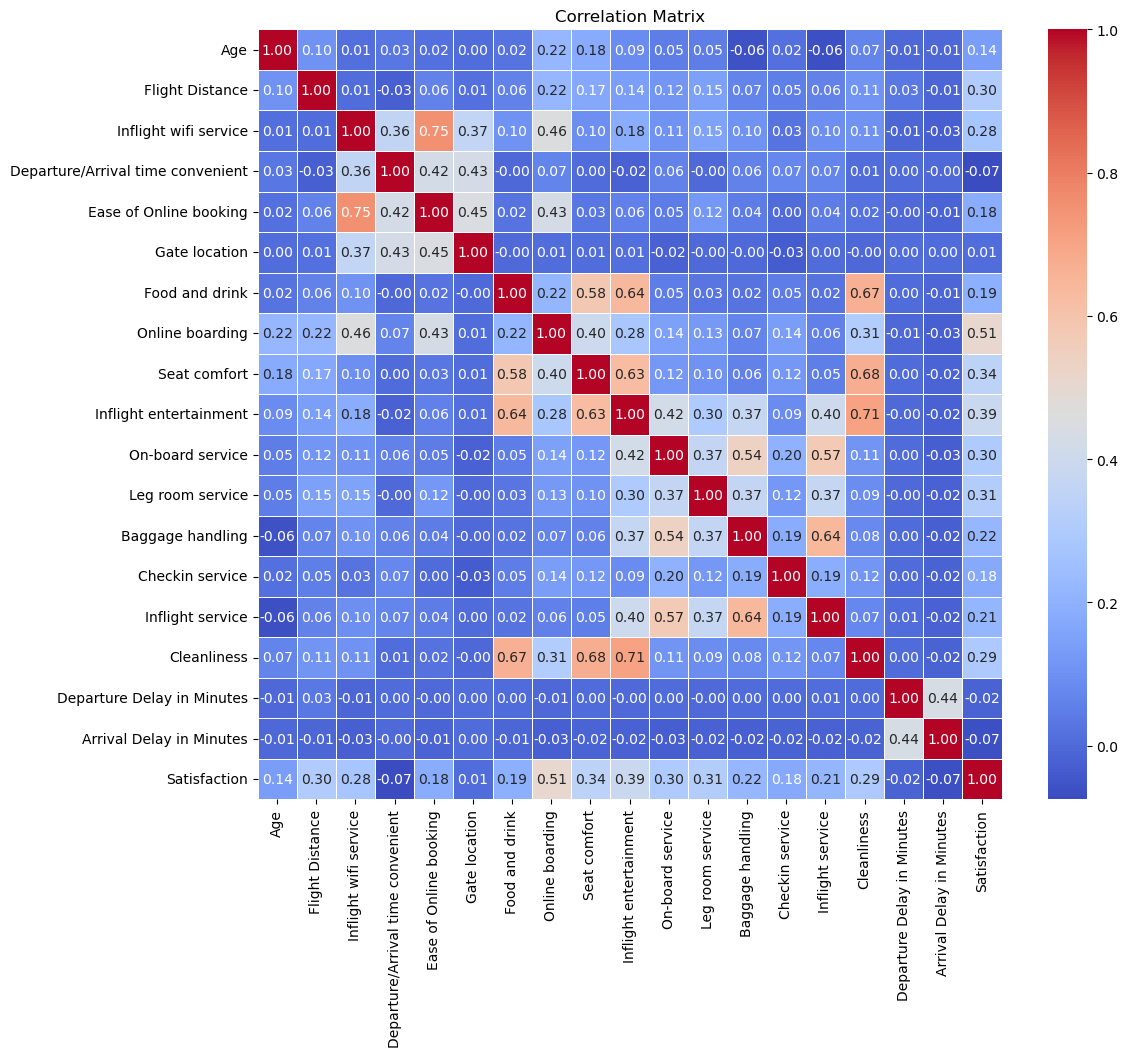

In [32]:
corr=df.copy()
corr['Satisfaction']=corr['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

correlation_matrix = corr._get_numeric_data().corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## 1. The ratings of ease of online booking and inflight wifi service are two of the most strongly correlated variables with one another, with an r value of 0.75.

## 2. Cleanliness ratings have a relatively strong positive correlation with food and drink, seat comfort, and inflight entertainment ratings.

## 3. Out of all of the individual factors, online boarding ratings have the strongest positive relationship to satisfaction. However, it is still not necessarily a strong correlation as the r value is only 0.51.

## 4. Baggage handling and inflight service have a relatively strong positive relationship.

## 5. Gate location has the weakest relationship to satisfaction

## Columns like Gender, Gate Location, Departure Delay, Arrival Delay, Departure/Arrival Time Convenient seem to be Unncecessary.

In [33]:
drop_col=['Gender','Arrival Delay in Minutes','Gate location','Departure/Arrival time convenient']

train.drop(drop_col,axis=1,inplace=True)
test.drop(drop_col,axis=1,inplace=True)

df = pd.concat([train, test], ignore_index = True)

In [35]:
df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied


### Customer Type ,Type of Travel and Class are Object Type Columns.Hence need to perform Encoding.

In [36]:
encoder = OneHotEncoder()
columns_to_encode = ['Customer Type', 'Type of Travel', 'Class']


encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_encode])
encoded_column_names = []


for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])


df.drop(columns_to_encode, axis=1, inplace=True)
df[encoded_column_names] = encoded_columns
df.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Cleanliness,Departure Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,...,5,25,neutral or dissatisfied,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25,235,3,3,1,3,1,1,1,5,...,1,1,neutral or dissatisfied,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26,1142,2,2,5,5,5,5,4,3,...,5,0,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25,562,2,5,2,2,2,2,2,5,...,2,11,neutral or dissatisfied,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,61,214,3,3,4,5,5,3,3,4,...,3,0,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,0.0


# Model Evaluation

In [37]:
X = df.drop("satisfaction", axis=1)
y = df['satisfaction']

# Splitting into training and temp sets first
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting the temp set into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

## Logistic Regression Model

In [38]:
LR = LogisticRegression(C=0.030571559019667797, fit_intercept=True, penalty='l1', solver='liblinear')
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

## Decision Tree Model

In [39]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=1, min_samples_split=10)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

## Random Forest Model

In [40]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

In [49]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

accuracy_scores = [accuracy_score(y_test, y_pred_LR), 
                   accuracy_score(y_test, y_pred_DT),
                   accuracy_score(y_test, y_pred_RF)]

precision_scores = [precision_score(y_test, y_pred_LR, pos_label='satisfied'),
                    precision_score(y_test, y_pred_DT, pos_label='satisfied'),
                    precision_score(y_test, y_pred_RF, pos_label='satisfied')]

recall_scores = [recall_score(y_test, y_pred_LR, pos_label='satisfied'),
                 recall_score(y_test, y_pred_DT, pos_label='satisfied'),
                 recall_score(y_test, y_pred_RF, pos_label='satisfied')]

# Create a DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
})

In [50]:
print('Model Evaluation Report: Test set')
results_df

Model Evaluation Report: Test set


,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.870526,0.860783,0.834811
1,Decision Tree,0.950651,0.960261,0.923807
2,Random Forest,0.960884,0.968191,0.940192


## Random Forest Model had the best Accuracy and Recall Among all three Models
## Decision Tree Shared the Best Value for Precision with Random Forest.

In [51]:
y_pred_val_LR = LR.predict(X_val)
y_pred_val_DT = DT.predict(X_val)
y_pred_val_RF = RF.predict(X_val)

accuracy_val_LR = accuracy_score(y_val, y_pred_val_LR)
precision_val_LR = precision_score(y_val, y_pred_val_LR, pos_label='satisfied')
recall_val_LR = recall_score(y_val, y_pred_val_LR, pos_label='satisfied')

accuracy_val_DT = accuracy_score(y_val, y_pred_val_DT)
precision_val_DT = precision_score(y_val, y_pred_val_DT, pos_label='satisfied')
recall_val_DT = recall_score(y_val, y_pred_val_DT, pos_label='satisfied')

accuracy_val_RF = accuracy_score(y_val, y_pred_val_RF)
precision_val_RF = precision_score(y_val, y_pred_val_RF, pos_label='satisfied')
recall_val_RF = recall_score(y_val, y_pred_val_RF, pos_label='satisfied')

validation_results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_val_LR,
                 accuracy_val_DT,
                 accuracy_val_RF],
    
    'Precision': [precision_val_LR,
                  precision_val_DT,
                  precision_val_RF],
    
    'Recall': [recall_val_LR,
               recall_val_DT,
               recall_val_RF]
})

In [52]:
print('Model Evaluation Report: Validation set')
validation_results_df

Model Evaluation Report: Validation set


,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.871766,0.869093,0.830465
1,Decision Tree,0.952197,0.962823,0.925923
2,Random Forest,0.962275,0.971253,0.941182


## Even For Validation Set Random Forest had the best Accuracy, Precision and Recall.

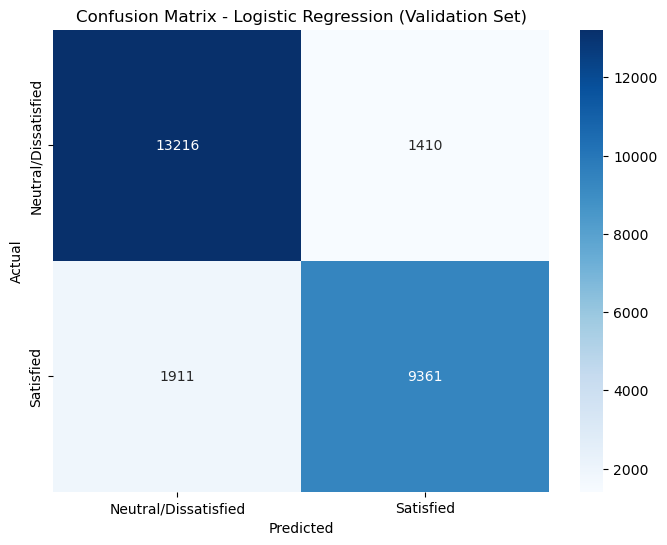

In [67]:
conf_matrix_rf_val = confusion_matrix(y_val, y_pred_val_LR)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Confusion Matrix - Logistic Regression (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

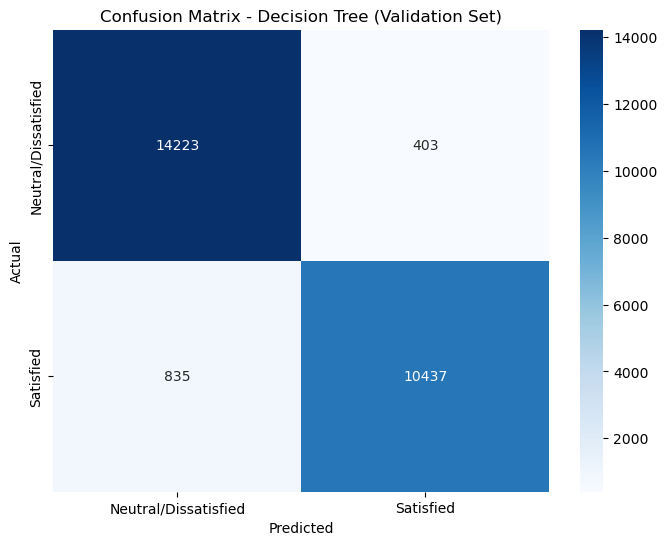

In [68]:
conf_matrix_rf_val = confusion_matrix(y_val, y_pred_val_DT)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Confusion Matrix - Decision Tree (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

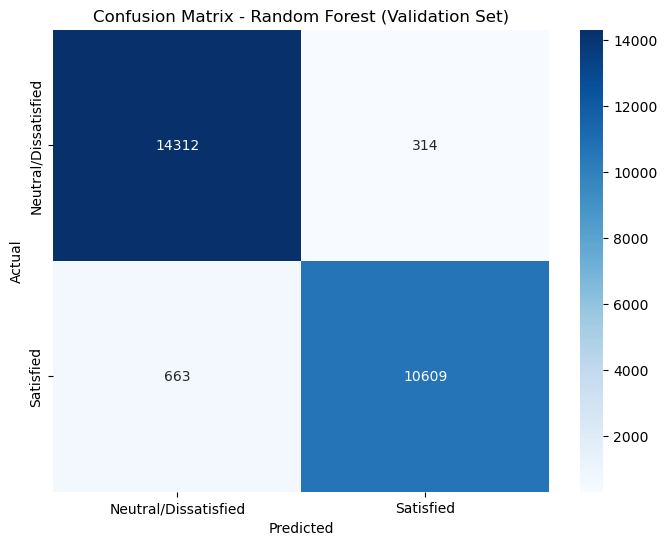

In [66]:
conf_matrix_rf_val = confusion_matrix(y_val, y_pred_val_RF)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Confusion Matrix - Random Forest (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

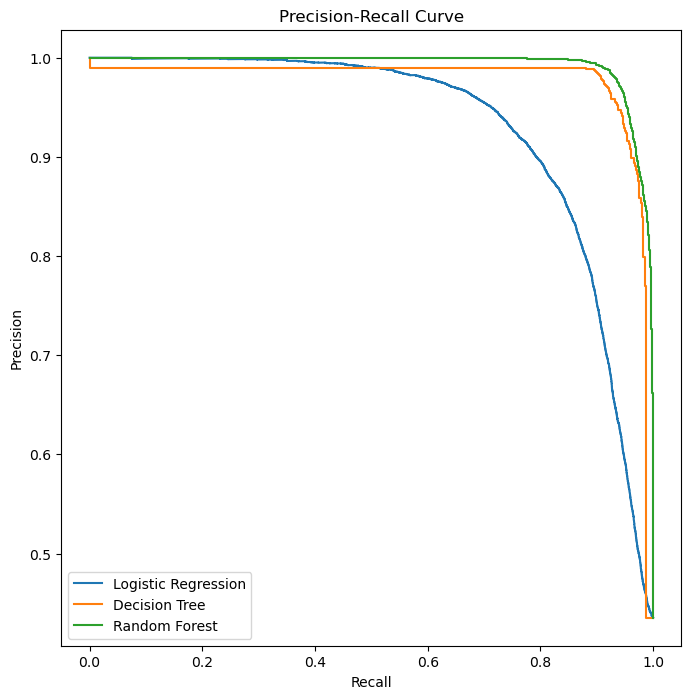

In [63]:
y_scores_LR = LR.predict_proba(X_val)[:, 1]  
y_scores_DT = DT.predict_proba(X_val)[:, 1]  
y_scores_RF = RF.predict_proba(X_val)[:, 1]  

precision_LR, recall_LR, _ = precision_recall_curve(y_val, y_scores_LR, pos_label='satisfied')
precision_DT, recall_DT, _ = precision_recall_curve(y_val, y_scores_DT, pos_label='satisfied')
precision_RF, recall_RF, _ = precision_recall_curve(y_val, y_scores_RF, pos_label='satisfied')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.step(recall_LR, precision_LR, where='post', label='Logistic Regression')
plt.step(recall_DT, precision_DT, where='post', label='Decision Tree')
plt.step(recall_RF, precision_RF, where='post', label='Random Forest')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# For this Data Set, Random Forest can be said to be the best model with Accuracy of 96%.